In [3]:
import sys
if not 'Autoformer' in sys.path[0]:
    sys.path[0] += '/Autoformer'


In [5]:
import argparse
import os
import torch
from exp.exp_main import Exp_Main
import random
import numpy as np
from utils.tools import dotdict

fix_seed = 2021 
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

2023-11-29:10:37:23,805 INFO     [utils.py:160] NumExpr defaulting to 8 threads.


## Synthetic Data

### First experiment - prediction length 24
Set arguements for our model :<br>
Data - Synthetic dataset 1<br>
Model - Autoformer<br>
Frequency - hourly<br>
Features - univariate
Encoder length - 96<br>
Label length - 48<br>
Prediction horizon - 24<br>


In [3]:
# args = parser.parse_args()
args = dotdict()
args.target = 'TARGET'
args.des = 'test'
args.dropout = 0.05
args.num_workers = 10
args.freq = 'h'
args.checkpoints = './checkpoints/'
args.bucket_size = 4
args.n_hashes = 4
args.is_trainging = True
args.root_path = './datasets'
args.data_path ='SYNTHh1.csv' 
args.model_id='Synth1_96_24'
args.model = 'Autoformer'
args.data = 'Synth1'
args.features = 'S' #univariate
args.seq_len = 96
args.label_len = 48
args.pred_len = 24
args.e_layers = 2
args.d_layers = 1
args.n_heads = 8
args.factor = 1
args.enc_in = 1
args.dec_in =1
args.c_out = 1
args.d_model = 512
args.des = 'Exp'
args.itr = 1
args.d_ff = 2048
args.moving_avg = 25
args.factor = 1
args.distil = True
args.output_attention = False
args.patience= 3
args.learning_rate = 0.0001
args.batch_size = 32 # batch size 32 as in the paper
args.embed = 'timeF'
args.activation = 'gelu'
args.use_amp = False
args.loss = 'mse'
args.train_epochs = 10 # epoch size is 10 as in the paper


# GPU 
args.gpu = 0
args.lradj = 'type1'
args.devices = '0,1,2,3'
args.use_multi_gpu = False
args.use_gpu = True if torch.cuda.is_available() else False

if args.use_gpu and args.use_multi_gpu:
     args.devices = args.devices.replace(' ', '')
     device_ids = args.devices.split(',')
     args.device_ids = [int(id_) for id_ in device_ids]
     args.gpu = args.device_ids[0]

print('Args in experiment:')
print(args)

Exp = Exp_Main



Args in experiment:
{'target': 'TARGET', 'des': 'Exp', 'dropout': 0.05, 'num_workers': 10, 'freq': 'h', 'checkpoints': './checkpoints/', 'bucket_size': 4, 'n_hashes': 4, 'is_trainging': True, 'root_path': './datasets', 'data_path': 'SYNTHh1.csv', 'model_id': 'Synth1_96_24', 'model': 'Autoformer', 'data': 'Synth1', 'features': 'S', 'seq_len': 96, 'label_len': 48, 'pred_len': 24, 'e_layers': 2, 'd_layers': 1, 'n_heads': 8, 'factor': 1, 'enc_in': 1, 'dec_in': 1, 'c_out': 1, 'd_model': 512, 'itr': 1, 'd_ff': 2048, 'moving_avg': 25, 'distil': True, 'output_attention': False, 'patience': 3, 'learning_rate': 0.0001, 'batch_size': 32, 'embed': 'timeF', 'activation': 'gelu', 'use_amp': False, 'loss': 'mse', 'train_epochs': 10, 'gpu': 0, 'lradj': 'type1', 'devices': '0,1,2,3', 'use_multi_gpu': False, 'use_gpu': True}


Train the model

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

for ii in range(args.itr):
    setting = '{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
        args.model_id,
        args.model,
        args.data,
        args.features,
        args.seq_len,
        args.label_len,
        args.pred_len,
        args.d_model,
        args.n_heads,
        args.e_layers,
        args.d_layers,
        args.d_ff,
        args.factor,
        args.embed,
        args.distil,
        args.des, ii)

    exp_synth24 = Exp(args)  # set experiments
    print(1)
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp_synth24.train(setting)
    print(2)
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    mae_synth24 , mse_synth24 , y_pred_synth24, y_true_synth24, first_batch_test_synth24 = exp_synth24.test(setting) 
    torch.cuda.empty_cache()
    print(3)



Use GPU: cuda:0
1
>>>>>>>start training : Synth1_96_24_Autoformer_Synth1_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 12075
val 1719
test 3461
	iters: 100, epoch: 1 | loss: 0.2359104
	speed: 0.0445s/iter; left time: 163.2163s
	iters: 200, epoch: 1 | loss: 0.2100698
	speed: 0.0337s/iter; left time: 120.4107s
	iters: 300, epoch: 1 | loss: 0.1431544
	speed: 0.0340s/iter; left time: 118.0915s
Epoch: 1 cost time: 13.88380765914917
Epoch: 1, Steps: 377 | Train Loss: 0.2740040 Vali Loss: 0.1552836 Test Loss: 0.1552531
Validation loss decreased (inf --> 0.155284).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 0.1093699
	speed: 0.1273s/iter; left time: 419.4737s
	iters: 200, epoch: 2 | loss: 0.0958582
	speed: 0.0329s/iter; left time: 105.2037s
	iters: 300, epoch: 2 | loss: 0.0830089
	speed: 0.0336s/iter; left time: 104.0148s
Epoch: 2 cost time: 12.729574203491211
Epoch: 2, Steps: 377 | Train Loss: 0.09739

In [ ]:
#Check the shape of the predictions and compare to real observations
print (y_pred_synth24.shape, y_true_synth24.shape)


(3461, 24, 1) (3461, 24, 1)


We have 3461 sequences of length 24, which is the prediction length we set.

In [5]:
#Shape of the the encoder and of the output in a single batch
print (first_batch_test_synth24['batch_x'].shape , first_batch_test_synth24['batch_y'].shape)

torch.Size([32, 96, 1]) (32, 24, 1)


In [13]:
#Shape of the marked data encoder and of the output in a single batch. 
#Each observation is assigned 4 marks - minute,hour,day of the week and day of the year.
print (first_batch_test_synth24['batch_x_mark'].shape , first_batch_test_synth24['batch_y_mark'].shape)

torch.Size([32, 96, 4]) torch.Size([32, 72, 4])


### Second experiment - prediction length 168
Set arguements for our model :<br>
Data - Synthetic dataset 1<br>
Model - Autoformer<br>
Frequency - hourly<br>
Features - univariate
Encoder length - 96<br>
Label length - 48<br>
Prediction horizon - 168<br>


In [18]:
#All we have to do is change the prediction length arguement, all other arguements stay the same
args.pred_len = 168
args.model_id='Synth1_96_168'

In [19]:


for ii in range(args.itr):
    setting = '{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
        args.model_id,
        args.model,
        args.data,
        args.features,
        args.seq_len,
        args.label_len,
        args.pred_len,
        args.d_model,
        args.n_heads,
        args.e_layers,
        args.d_layers,
        args.d_ff,
        args.factor,
        args.embed,
        args.distil,
        args.des, ii)

    exp_synth168 = Exp(args)  # set experiments
    print(1)
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp_synth168.train(setting)
    print(2)
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    mae_synth168 , mse_synth168 , y_pred_synth168, y_true_synth168, first_batch_test_synth168 = exp_synth168.test(setting) 
    torch.cuda.empty_cache()
    print(3)



Use GPU: cuda:0
1
>>>>>>>start training : Synth1_96_24_Autoformer_Synth1_ftS_sl96_ll48_pl168_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 11931
val 1575
test 3317
	iters: 100, epoch: 1 | loss: 0.7999461
	speed: 0.0567s/iter; left time: 205.3560s
	iters: 200, epoch: 1 | loss: 0.6061885
	speed: 0.0446s/iter; left time: 157.1743s
	iters: 300, epoch: 1 | loss: 0.4545492
	speed: 0.0443s/iter; left time: 151.5921s
Epoch: 1 cost time: 18.01553988456726
Epoch: 1, Steps: 372 | Train Loss: 0.6737944 Vali Loss: 0.7241444 Test Loss: 0.6841215
Validation loss decreased (inf --> 0.724144).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 0.4522540
	speed: 0.1691s/iter; left time: 549.4047s
	iters: 200, epoch: 2 | loss: 0.4127157
	speed: 0.0473s/iter; left time: 148.9876s
	iters: 300, epoch: 2 | loss: 0.4596690
	speed: 0.0463s/iter; left time: 141.0281s
Epoch: 2 cost time: 18.036471128463745
Epoch: 2, Steps: 372 | Train Loss: 0.4518

### Third experiment - prediction length 720
Set arguements for our model :<br>
Data - Synthetic dataset 1<br>
Model - Autoformer<br>
Frequency - hourly<br>
Features - univariate
Encoder length - 96<br>
Label length - 48<br>
Prediction horizon - 720<br>


In [21]:
args.pred_len = 720
args.model_id='Synth1_96_720'

In [22]:


for ii in range(args.itr):
    setting = '{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
        args.model_id,
        args.model,
        args.data,
        args.features,
        args.seq_len,
        args.label_len,
        args.pred_len,
        args.d_model,
        args.n_heads,
        args.e_layers,
        args.d_layers,
        args.d_ff,
        args.factor,
        args.embed,
        args.distil,
        args.des, ii)

    exp_synth720 = Exp(args)  # set experiments
    print(1)
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp_synth720.train(setting)
    print(2)
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    mae_synth720 , mse_synth720 , y_pred_synth720, y_true_synth720, first_batch_test_synth720 = exp_synth720.test(setting) 
    torch.cuda.empty_cache()
    print(3)



Use GPU: cuda:0
1
>>>>>>>start training : Synth1_96_24_Autoformer_Synth1_ftS_sl96_ll48_pl720_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 11379
val 1023
test 2765
	iters: 100, epoch: 1 | loss: 0.8391340
	speed: 0.1215s/iter; left time: 419.3440s
	iters: 200, epoch: 1 | loss: 0.9062921
	speed: 0.1144s/iter; left time: 383.3475s
	iters: 300, epoch: 1 | loss: 0.7131192
	speed: 0.1113s/iter; left time: 361.8280s
Epoch: 1 cost time: 41.282639503479004
Epoch: 1, Steps: 355 | Train Loss: 0.8701672 Vali Loss: 0.9200913 Test Loss: 1.1415159
Validation loss decreased (inf --> 0.920091).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 0.5547497
	speed: 0.3073s/iter; left time: 951.5142s
	iters: 200, epoch: 2 | loss: 0.5021075
	speed: 0.1151s/iter; left time: 344.8169s
	iters: 300, epoch: 2 | loss: 0.3386720
	speed: 0.1173s/iter; left time: 339.7115s
Epoch: 2 cost time: 41.583579540252686
Epoch: 2, Steps: 355 | Train Loss: 0.513

## Wind data

Set arguements for our model :<br>
Data - Wind dataset - Germany data<br>
Model - Autoformer<br>
Frequency - hourly<br>
Features - univariate<br>
Encoder length - 96<br>
Label length - 48<br>
Prediction horizon - 24<br>

In [54]:
args.data_path ='DEWINDh_small.csv' 
args.model_id='Windh1_96_24'
args.data = 'Windh1'
args.model = 'Autoformer'
args.freq = 'h'
args.features = 'S' #univariate
args.seq_len = 96
args.label_len = 48
args.pred_len = 24


Use GPU: cuda:0
1
>>>>>>>start training : Windh1_96_24_Autoformer_Windh1_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 12075
val 1719
test 3461
	iters: 100, epoch: 1 | loss: 0.2262222
	speed: 0.0537s/iter; left time: 197.2418s
	iters: 200, epoch: 1 | loss: 0.1439280
	speed: 0.0481s/iter; left time: 171.6231s
	iters: 300, epoch: 1 | loss: 0.1647919
	speed: 0.0414s/iter; left time: 143.8009s
Epoch: 1 cost time: 16.87926697731018
Epoch: 1, Steps: 377 | Train Loss: 0.2274490 Vali Loss: 0.2469572 Test Loss: 0.1754361
Validation loss decreased (inf --> 0.246957).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 0.1221796
	speed: 0.1667s/iter; left time: 548.9618s
	iters: 200, epoch: 2 | loss: 0.1357572
	speed: 0.0596s/iter; left time: 190.2716s
	iters: 300, epoch: 2 | loss: 0.1400735
	speed: 0.0586s/iter; left time: 181.4207s
Epoch: 2 cost time: 22.291480541229248
Epoch: 2, Steps: 377 | Train Loss: 0.15390

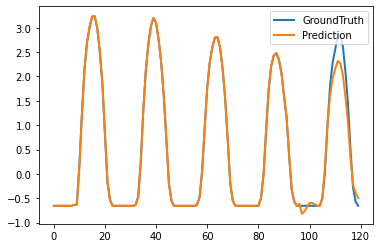

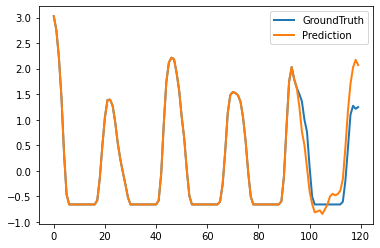

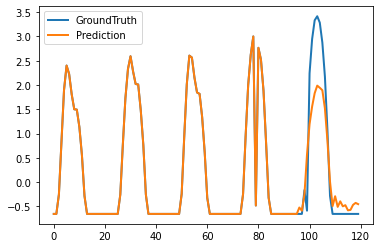

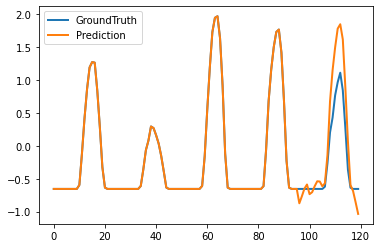

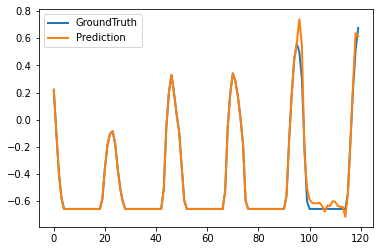

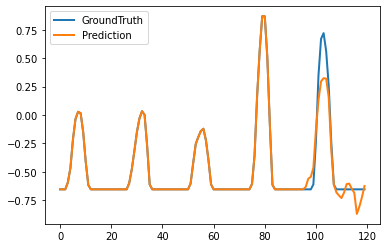

In [55]:
for ii in range(args.itr):
    setting = '{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
        args.model_id,
        args.model,
        args.data,
        args.features,
        args.seq_len,
        args.label_len,
        args.pred_len,
        args.d_model,
        args.n_heads,
        args.e_layers,
        args.d_layers,
        args.d_ff,
        args.factor,
        args.embed,
        args.distil,
        args.des, ii)

    exp_wind24 = Exp(args)  # set experiments
    print(1)
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp_wind24.train(setting)
    print(2)
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    mae_wind24 , mse_wind24 , y_pred_wind24, y_true_wind24, first_batch_test_wind24 = exp_wind24.test(setting) 
    torch.cuda.empty_cache()
    print(3)

### Second experiment - prediction length 168
Set arguements for our model :<br>
Data - Wind dataset 1<br>
Model - Autoformer<br>
Frequency - hourly<br>
Feature - univariate<br>
Encoder length - 96<br>
Label length - 48<br>
Prediction horizon - 168<br>


In [33]:
args.model_id='Windh1_96_168'
args.pred_len = 168


In [34]:
for ii in range(args.itr):
    setting = '{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
        args.model_id,
        args.model,
        args.data,
        args.features,
        args.seq_len,
        args.label_len,
        args.pred_len,
        args.d_model,
        args.n_heads,
        args.e_layers,
        args.d_layers,
        args.d_ff,
        args.factor,
        args.embed,
        args.distil,
        args.des, ii)

    exp_wind168 = Exp(args)  # set experiments
    print(1)
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp_wind168.train(setting)
    print(2)
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    mae_wind168 , mse_wind168 , y_pred_wind168, y_true_wind168, first_batch_test_wind168 = exp_wind168.test(setting) 
    torch.cuda.empty_cache()
    print(3)

Use GPU: cuda:0
1
>>>>>>>start training : Windh1_96_168_Autoformer_Windh1_ftS_sl96_ll48_pl168_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 11931
val 1575
test 3317
	iters: 100, epoch: 1 | loss: 0.3504180
	speed: 0.0767s/iter; left time: 277.6700s
	iters: 200, epoch: 1 | loss: 0.2949899
	speed: 0.0738s/iter; left time: 259.6748s
	iters: 300, epoch: 1 | loss: 0.2859084
	speed: 0.0753s/iter; left time: 257.6516s
Epoch: 1 cost time: 28.00835347175598
Epoch: 1, Steps: 372 | Train Loss: 0.3384665 Vali Loss: 0.3418216 Test Loss: 0.2820786
Validation loss decreased (inf --> 0.341822).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 0.2775863
	speed: 0.2357s/iter; left time: 765.8384s
	iters: 200, epoch: 2 | loss: 0.2888315
	speed: 0.0773s/iter; left time: 243.3343s
	iters: 300, epoch: 2 | loss: 0.2476470
	speed: 0.0691s/iter; left time: 210.6281s
Epoch: 2 cost time: 28.173903942108154
Epoch: 2, Steps: 372 | Train Loss: 0.248

### Third experiment - prediction length 720
Set arguements for our model :<br>
Data - Wind dataset 1<br>
Model - Autoformer<br>
Frequency - hourly<br>
Feature - univariate<br>
Encoder length - 96<br>
Label length - 48<br>
Prediction horizon - 720<br>


In [35]:
args.model_id='Windh1_96_720'
args.pred_len = 720


In [36]:
for ii in range(args.itr):
    setting = '{}_{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_fc{}_eb{}_dt{}_{}_{}'.format(
        args.model_id,
        args.model,
        args.data,
        args.features,
        args.seq_len,
        args.label_len,
        args.pred_len,
        args.d_model,
        args.n_heads,
        args.e_layers,
        args.d_layers,
        args.d_ff,
        args.factor,
        args.embed,
        args.distil,
        args.des, ii)

    exp_wind720 = Exp(args)  # set experiments
    print(1)
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp_wind720.train(setting)
    print(2)
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    mae_wind720 , mse_wind720 , y_pred_wind720, y_true_wind720, first_batch_test_wind720 = exp_wind720.test(setting) 
    torch.cuda.empty_cache()
    print(3)

Use GPU: cuda:0
1
>>>>>>>start training : Windh1_96_720_Autoformer_Windh1_ftS_sl96_ll48_pl720_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 11379
val 1023
test 2765
	iters: 100, epoch: 1 | loss: 0.3500079
	speed: 0.1957s/iter; left time: 675.4258s
	iters: 200, epoch: 1 | loss: 0.2912555
	speed: 0.1641s/iter; left time: 550.0364s
	iters: 300, epoch: 1 | loss: 0.3235041
	speed: 0.1771s/iter; left time: 575.8076s
Epoch: 1 cost time: 60.85702729225159
Epoch: 1, Steps: 355 | Train Loss: 0.3269537 Vali Loss: 0.3417270 Test Loss: 0.3934911
Validation loss decreased (inf --> 0.341727).  Saving model ...
Updating learning rate to 0.0001
	iters: 100, epoch: 2 | loss: 0.2511774
	speed: 0.4219s/iter; left time: 1306.2298s
	iters: 200, epoch: 2 | loss: 0.2489091
	speed: 0.1804s/iter; left time: 540.4789s
	iters: 300, epoch: 2 | loss: 0.2387905
	speed: 0.1870s/iter; left time: 541.4119s
Epoch: 2 cost time: 67.17349648475647
Epoch: 2, Steps: 355 | Train Loss: 0.252